In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from activities.fitness import (Fitness, FitnessActivity)

sns.set_theme(style="whitegrid")

## Get all Fitness Activities as list of activities.fitness.FitnessActivity

In [385]:
fitness_activities = Fitness.get_all_activities()

In [386]:
print(f'Total fitness activities: {len(fitness_activities)}')

Total fitness activities: 297


In [404]:
last_fitness_act = FitnessActivity(fitness_activities[-1])

In [406]:
vars(last_fitness_act)

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x123d404d0>,
 'id': None,
 'name': 'Cardio',
 'sport': 'fitness_equipment',
 'sub_sport': 'cardio_training',
 'training_load': 87.95875549316406,
 'training_effect': 2.8,
 'anaerobic_training_effect': 2.1,
 'start_time': datetime.datetime(2025, 11, 15, 14, 39, 11),
 'stop_time': datetime.datetime(2025, 11, 15, 14, 39, 11),
 'moving_time': datetime.time(0, 50, 34, 482000),
 'avg_hr': 133,
 'max_hr': 164,
 'calories': 426,
 'hrz_1': None,
 'hrz_2': None,
 'hrz_3': None,
 'hrz_4': None,
 'hrz_5': None,
 'hrz_1_time': datetime.time(0, 4, 18, 181000),
 'hrz_2_time': datetime.time(0, 17, 25, 917000),
 'hrz_3_time': datetime.time(0, 19, 0, 28000),
 'hrz_4_time': datetime.time(0, 7, 4, 115000),
 'hrz_5_time': datetime.time(0, 0)}

## Get all Fitness Activities as Pandas DataFrame

In [388]:
df = Fitness.get_all_activities_df()

In [389]:
df.shape

(297, 24)

In [390]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   _sa_instance_state         297 non-null    object        
 1   id                         297 non-null    object        
 2   name                       296 non-null    object        
 3   sport                      297 non-null    object        
 4   sub_sport                  297 non-null    object        
 5   training_load              297 non-null    float64       
 6   training_effect            297 non-null    float64       
 7   anaerobic_training_effect  297 non-null    float64       
 8   start_time                 297 non-null    datetime64[ns]
 9   stop_time                  297 non-null    datetime64[ns]
 10  moving_time                297 non-null    object        
 11  avg_hr                     297 non-null    int64         
 12  max_hr  

In [391]:
df.columns

Index(['_sa_instance_state', 'id', 'name', 'sport', 'sub_sport',
       'training_load', 'training_effect', 'anaerobic_training_effect',
       'start_time', 'stop_time', 'moving_time', 'avg_hr', 'max_hr',
       'calories', 'hrz_1', 'hrz_2', 'hrz_3', 'hrz_4', 'hrz_5', 'hrz_1_time',
       'hrz_2_time', 'hrz_3_time', 'hrz_4_time', 'hrz_5_time'],
      dtype='object')

In [392]:
df.sport.unique()

array(['fitness_equipment'], dtype=object)

In [393]:
df['sub_sport'].value_counts()

sub_sport
strength_training    182
cardio_training       82
hiit                  32
pilates                1
Name: count, dtype: int64

 ## Clean data

In [394]:
filterd_df = df[df['sub_sport'].isin({'strength_training', 'cardio_training', 'hiit'})].copy()

In [395]:
filterd_df.sub_sport.value_counts()

sub_sport
strength_training    182
cardio_training       82
hiit                  32
Name: count, dtype: int64

In [396]:
filterd_df.drop('_sa_instance_state', axis=1, inplace=True)

In [397]:
sub_sport_map = {
    'strength_training': 'Strength Training',
    'cardio_training': 'Cardio Training',
    'hiit': 'HIIT'
}

filterd_df['sub_sport_label'] = filterd_df['sub_sport'].map(sub_sport_map)

In [398]:
filterd_df.head()

,id,name,sport,sub_sport,training_load,training_effect,anaerobic_training_effect,start_time,stop_time,moving_time,...,hrz_2,hrz_3,hrz_4,hrz_5,hrz_1_time,hrz_2_time,hrz_3_time,hrz_4_time,hrz_5_time,sub_sport_label
0,11756723923,Superset,fitness_equipment,strength_training,67.242126,2.5,2.1,2023-08-10 18:55:49,2023-08-10 19:59:07,00:54:10.048000,...,116,135,154,174,00:02:21.546000,00:35:52.749000,00:13:50.218000,00:01:03.687000,00:00:09,Strength Training
1,11763858267,Sức bền,fitness_equipment,strength_training,62.105835,2.5,1.9,2023-08-11 18:43:18,2023-08-11 19:37:16,00:53:51.587000,...,116,135,154,174,00:08:58.620000,00:27:20.567000,00:15:04.658000,00:01:12,00:00:07,Strength Training
2,11786911035,Legs day,fitness_equipment,strength_training,82.467545,3.5,2.4,2023-08-14 19:40:15,2023-08-14 20:35:41,00:55:16.608000,...,116,135,154,174,00:01:12.457000,00:22:04.256000,00:28:18.680000,00:03:25.197000,00:00:00,Strength Training
3,11794395844,METCON,fitness_equipment,cardio_training,111.792419,4.2,2.2,2023-08-15 18:46:47,2023-08-15 19:30:55,00:44:00.616000,...,116,135,154,174,00:00:01.001000,00:05:54.781000,00:23:02.748000,00:14:56.169000,00:00:00,Cardio Training
4,11802626059,Push day,fitness_equipment,strength_training,36.578430,2.1,0.7,2023-08-16 19:47:30,2023-08-16 20:28:17,00:40:43.124000,...,116,135,154,174,00:07:50.121000,00:24:07.901000,00:07:50.092000,00:00:17.175000,00:00:00,Strength Training


## Monthly Total Calories Burned Over Time

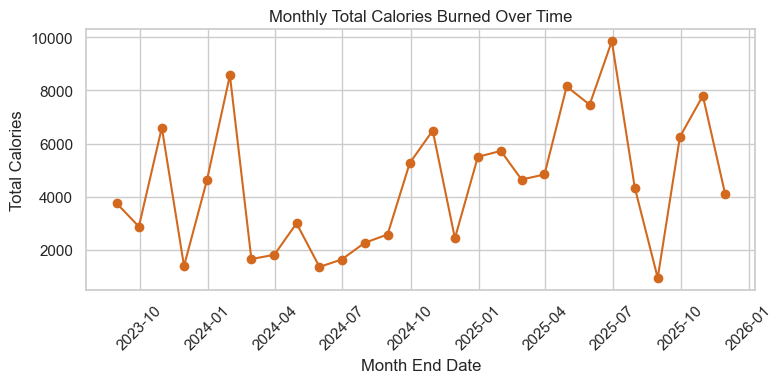

In [399]:
df_monthly = filterd_df.set_index('start_time')['calories'].resample('ME').sum().fillna(0)

plt.figure(figsize=(8, 4))
plt.plot(df_monthly.index, df_monthly.values, marker='o', linestyle='-', color='chocolate')
plt.xticks(rotation=90)
plt.title('Monthly Total Calories Burned Over Time')
plt.xlabel('Month End Date')
plt.ylabel('Total Calories')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('1_Line_Chart_Monthly_Calories.png')
plt.show()

## Total Training Load by Fitness Activity Type

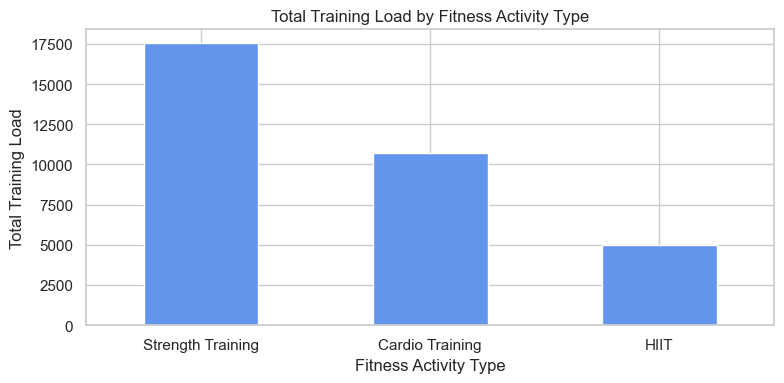

In [400]:
df_sub_sport_load = filterd_df.groupby('sub_sport_label')['training_load'].sum().sort_values(ascending=False)

plt.figure(figsize=(8, 4))
df_sub_sport_load.plot(kind='bar', color='cornflowerblue')
plt.xticks(rotation=90)
plt.xticks(rotation=90)
plt.title('Total Training Load by Fitness Activity Type')
plt.xlabel('Fitness Activity Type')
plt.ylabel('Total Training Load')
plt.xticks(rotation=0, ha='center')
plt.tight_layout()

plt.savefig('2_Bar_Chart_Training_Load_by_Sport.png')
plt.show()

## Distribution of Average Heart Rate (BPM)

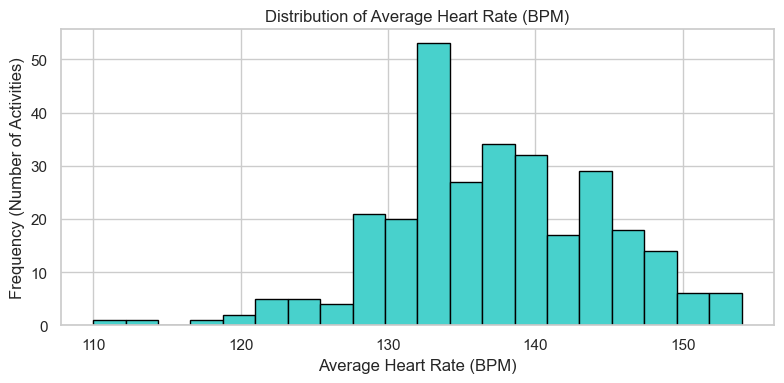

Generated 3_Histogram_Avg_Heart_Rate.png


In [401]:
# --- 3. Histogram (Distribution/Frequency) ---
# Goal: Visualize the frequency distribution of Average Heart Rate

plt.figure(figsize=(8, 4))

# Use .loc to only include activities where the avg_hr is reasonable (e.g., > 60 BPM)
# and then plot the histogram with 20 bins.
filterd_df['avg_hr'].loc[filterd_df['avg_hr'] > 60].hist(
    bins=20,
    edgecolor='black',
    color='mediumturquoise',
)
plt.title('Distribution of Average Heart Rate (BPM)')
plt.xlabel('Average Heart Rate (BPM)')
plt.ylabel('Frequency (Number of Activities)')
plt.tight_layout()

# Save the chart
plt.savefig('3_Histogram_Avg_Heart_Rate.png')
plt.show() # Use plt.show() if running in a Jupyter Notebook or IDE

print("Generated 3_Histogram_Avg_Heart_Rate.png")

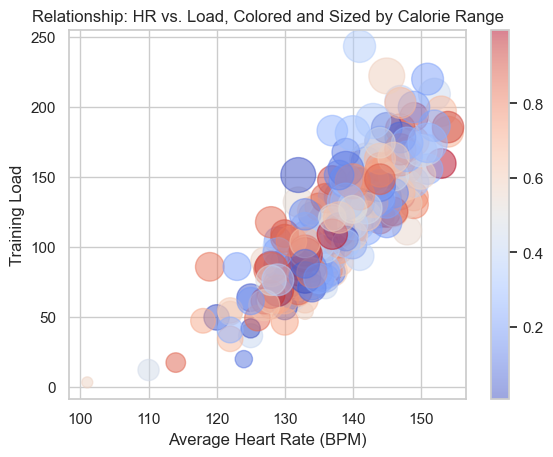

Generated 4_Bubble_Chart_Relationship.png


In [402]:
rng = np.random.RandomState(0)

x = df['avg_hr']
y = df['training_load']
sizes = df['calories']

colors = rng.rand(len(x))

plt.scatter(x,
            y,
            c=colors,
            s=sizes,
            alpha=0.5, # transparency
            cmap='coolwarm')


plt.title('Relationship: HR vs. Load, Colored and Sized by Calorie Range')
plt.xlabel('Average Heart Rate (BPM)')
plt.ylabel('Training Load')
plt.colorbar();  # show color scale


plt.savefig('4_Bubble_Chart_Relationship.png')
plt.show() # Use plt.show() if running in a Jupyter Notebook or IDE

print("Generated 4_Bubble_Chart_Relationship.png")

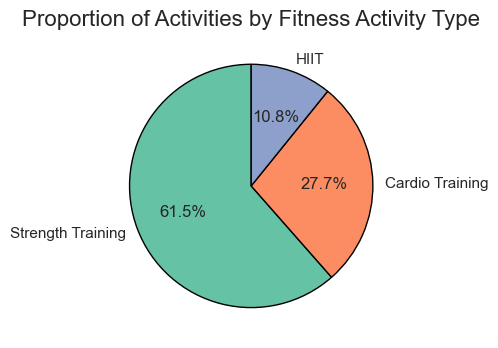

Generated 5_Pie_Chart_Activity_Proportions.png


In [403]:
sub_sport_counts = filterd_df['sub_sport_label'].value_counts()

plt.figure(figsize=(5, 5))

# 2. Plot the pie chart
plt.pie(
    sub_sport_counts.values,            # The counts (values)
    labels=sub_sport_counts.index,      # The sport names (labels)
    autopct='%1.1f%%',              # Format to display percentages (e.g., 10.5%)
    startangle=90,                  # Start the first slice at the top
    colors=sns.color_palette("Set2"), # Use a pastel color palette
    wedgeprops={'edgecolor': 'black'} # Add borders to slices for clarity
)

plt.title('Proportion of Activities by Fitness Activity Type', fontsize=16)
plt.tight_layout()

# 3. Save the chart
plt.savefig('5_Pie_Chart_Activity_Proportions.png')
plt.show() # Use plt.show() if running in a Jupyter Notebook or IDE

print("Generated 5_Pie_Chart_Activity_Proportions.png")